In [1]:
import numpy as np
import sys
from scipy import linalg
from pylab import *
import pylab as pl
from random import randrange
import pandas as pd
import matplotlib
pd.options.display.max_columns = None
from sklearn.decomposition import PCA

# **Reading Data For Customer Clustering**


In [2]:
df = pd.read_excel("Clustering_data.xlsx")
df

,"Income (in $10,000s)",Average Purchase (in $100s),Last year purchases,Number of Dependents
0,7.8,1.59,5,0
1,1.1,0.63,1,0
2,7.2,1.03,6,2
3,8.0,1.43,5,1
4,1.0,0.35,2,0
...,...,...,...,...
295,1.4,0.74,2,0
296,3.0,0.53,5,3
297,9.6,1.00,9,1
298,0.8,0.38,1,0


# **Nomalizing Data**

In [3]:
#Creating normalized Dataframe
df_norm = pd.DataFrame(data = [] , index = np.arange(0,len(df)), columns = [df.columns.values])

#Normalizing Data
for i in range(0, len(df.columns)):
  column_norm = ( df.iloc[:,i]- mean(df.iloc[:,i]) ) / std(df.iloc[:,i]) 
  df_norm.iloc[:,i] = column_norm

df_norm

,"Income (in $10,000s)",Average Purchase (in $100s),Last year purchases,Number of Dependents
0,1.182523,1.204336,0.233657,-0.957114
1,-1.175017,-0.767180,-1.425444,-0.957114
2,0.971400,0.054285,0.648432,0.976449
3,1.252898,0.875750,0.233657,0.009668
4,-1.210204,-1.342205,-1.010669,-0.957114
...,...,...,...,...
295,-1.069455,-0.541277,-1.010669,-0.957114
296,-0.506461,-0.972546,0.233657,1.943231
297,1.815892,-0.007325,1.892757,0.009668
298,-1.280578,-1.280596,-1.425444,-0.957114


# **Finding Best Clustering Centroids**

# **Ideal Solution for this DataFrame**

In [ ]:
#Ideal Solution for System
lista = [102,111,169]
centroids = pd.DataFrame(data = [] , index = lista, columns = [df.columns.values])

for i in range(0, 3):
  centroids.iloc[i,:] = df_norm.iloc[lista[i],:]
centroids

,"Income (in $10,000s)",Average Purchase (in $100s),Last year purchases,Number of Dependents
102,-1.24539,-1.07523,-1.01067,-0.957114
111,1.07696,1.01951,1.06321,0.00966782
169,0.197283,-0.00732473,0.233657,0.976449


# **Finding Best Clustering Centroids**

In [7]:
##Hypotesis of 3 Clusters

number_clusters = 3

## Generating Random Clusters
def Generate_Clusters():
  iterations = []

  for i in range (0,number_clusters):
    iteration = randrange(0,len(df))
    iterations.append(iteration)

  centroids = pd.DataFrame(data = [] , index = iterations, columns = [df.columns.values])

  #Defining number_clusters  Centroids
  for i in range(0, number_clusters):
    centroids.iloc[i,:] = df_norm.iloc[iterations[i],:].values
  print(centroids)
  return centroids

In [8]:
#Calculating Square Distance between normalized data and Centroids

def Calc_Dist (centroids):
  df_distances = pd.DataFrame(data = [] , index = np.arange(0,len(df)), columns = ["Distance Centroid 1","Distance Centroid 2","Distance Centroid 3","Minimun Distance","Cluster Aligment"])

  for k in range (0,number_clusters):
    distances = []

    for j in range (0, len(df)):
      distance_1 = 0  
      for i in range(0, len(df.columns)):
        distance_1 = distance_1 + (df_norm.iloc[j,i] - centroids.iloc[k,i])**2
      distances.append(distance_1)

    df_distances.iloc[:,k] = distances

  # Determinating Minimun Distace Between Data and Clusters
  for i in range (0,len(df)):
    df_distances.iloc[i,number_clusters] = min(df_distances.iloc[i,:])
  
  # Determinating Cluster Assigment
  for i in range (0,len(df)):
    if (df_distances.iloc[i,number_clusters] == df_distances.iloc[i,0]):
      df_distances.iloc[i,4] = 1
    elif (df_distances.iloc[i,number_clusters] == df_distances.iloc[i,1]):
      df_distances.iloc[i,4] = 2
    else:
       df_distances.iloc[i,4] = 3

  return df_distances

In [9]:
# Calculando Distancia e Distancia Total com os 3 centroides escolhidos
num_iteracoes = 1000
tentativas = [num_iteracoes]
tentativas [0] = 1e4

for i in range (0,num_iteracoes):
  if tentativas[i] > 350:
    centroids = Generate_Clusters()
    df_distancias_final = Calc_Dist(centroids)
    Total_Dist = sum(df_distancias_final["Minimun Distance"])
    tentativas.append(Total_Dist)
  else:
    break

print("Total Distance",Total_Dist)
df_distancias_final

    Income (in $10,000s)  Average Purchase (in $100s) Last year purchases  \
22              0.619529                     -0.52074           -0.181118   
228             0.408406                     0.444481             1.06321   
3                 1.2529                      0.87575            0.233657   

    Number of Dependents  
22               1.94323  
228           0.00966782  
3             0.00966782  
   Income (in $10,000s)  Average Purchase (in $100s) Last year purchases  \
22             0.619529                     -0.52074           -0.181118   
28             0.267657                   -0.0278614            0.233657   
49             -1.17502                      -1.5065            -1.01067   

   Number of Dependents  
22              1.94323  
28              1.94323  
49            -0.957114  
    Income (in $10,000s)  Average Purchase (in $100s) Last year purchases  \
299             -1.10464                     -1.42435            -1.01067   
26                1.

,Distance Centroid 1,Distance Centroid 2,Distance Centroid 3,Minimun Distance,Cluster Aligment
0,2.027772,6.177488,10.372396,2.02777,1
1,13.748557,8.951867,0.199031,0.199031,3
2,2.469701,0.775092,11.530263,0.775092,2
3,1.254685,2.828811,10.564149,1.25468,1
4,14.505854,9.049938,0.547830,0.54783,3
...,...,...,...,...,...
295,10.691391,7.176743,0.014939,0.014939,3
296,10.015521,2.361574,10.543962,2.36157,2
297,3.615396,6.307178,18.664780,3.6154,1
298,16.348460,10.296573,0.642471,0.642471,3


# **Dimensional Reduction (PCA)**

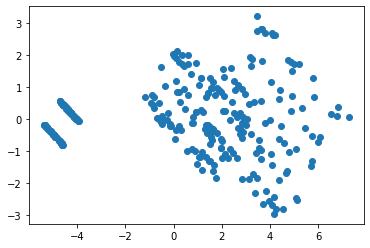

In [10]:
pca = PCA(n_components=2).fit(df)
pca_2d = pca.transform(df)
scatter(pca_2d[:,0],pca_2d[:,1])

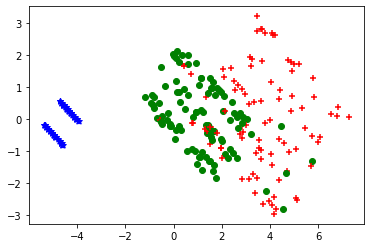

In [11]:
## Clustering Plot View

for i in range(0, pca_2d.shape[0]):
  if df_distancias_final.iloc[i,4] == 1:
    c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='+')
  elif df_distancias_final.iloc[i,4] == 2:
    c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g',marker='o')
  elif df_distancias_final.iloc[i,4] == 3:
    c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='*')

pl.show()